# Spam Email Detection Using Perceptron 

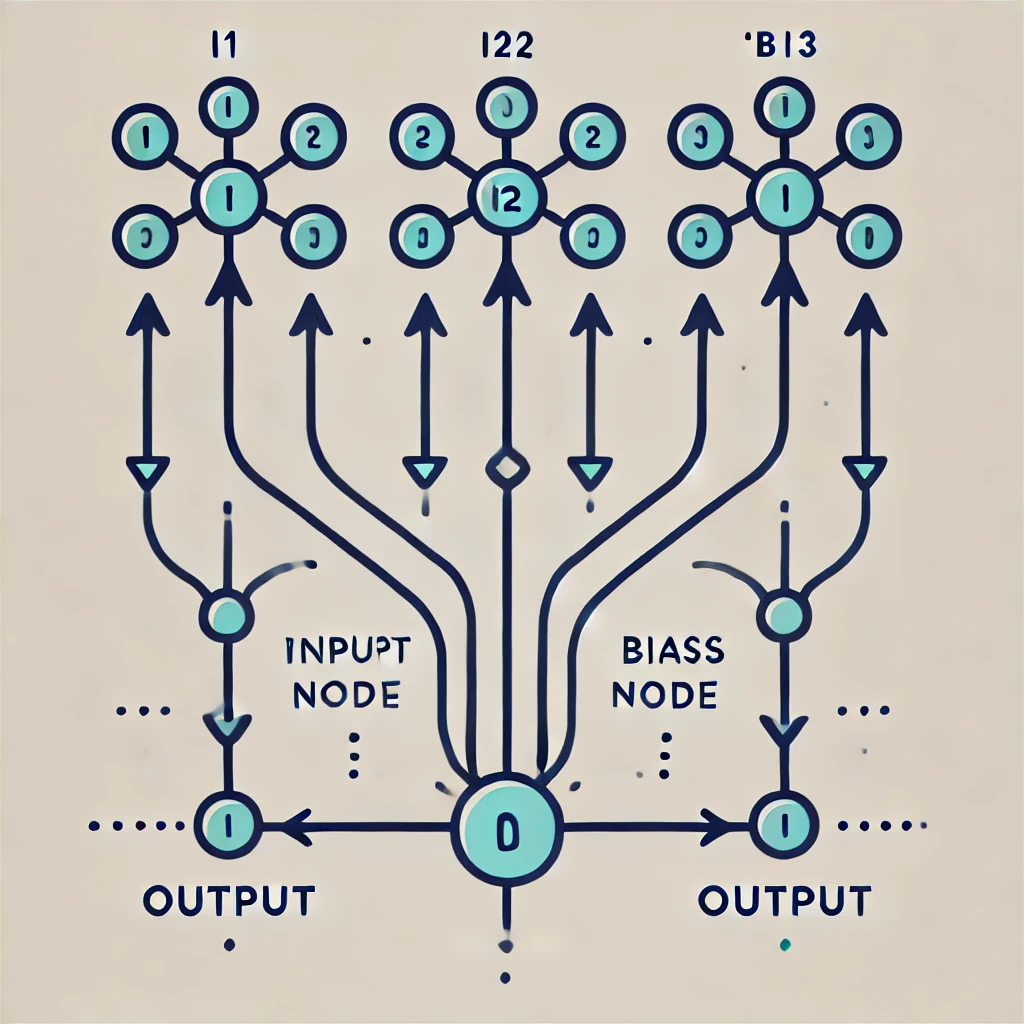

### What Are We Going to Do?

In this project, we will build a **Simple Spam Email Detector** using the **Perceptron** algorithm, a basic yet powerful machine learning model. Our goal is to create a system that can effectively classify emails as **spam** or **not spam** based on their content.

To achieve this, we will follow these main steps:

1. **Data Collection and Preparation:** 
   - Gather a dataset of both spam and legitimate emails.
   - Clean and preprocess the data to make it suitable for analysis.

2. **Feature Extraction:** 
   - Convert email text into numerical features using techniques like TF-IDF.

3. **Perceptron Implementation:** 
   - Train the perceptron model on the prepared dataset to learn distinguishing patterns.

4. **Model Evaluation:** 
   - Assess the model’s performance using metrics such as accuracy and precision.

By the end of this project, we aim to demonstrate how a perceptron can be effectively applied to solve real-world text classification problems like spam detection.

### A visualization of a Perceptron Model

https://vinizinho.net/projects/perceptron-viz/

# Step 1

## Data Collection and Preprocessing

## Selected Dataset:

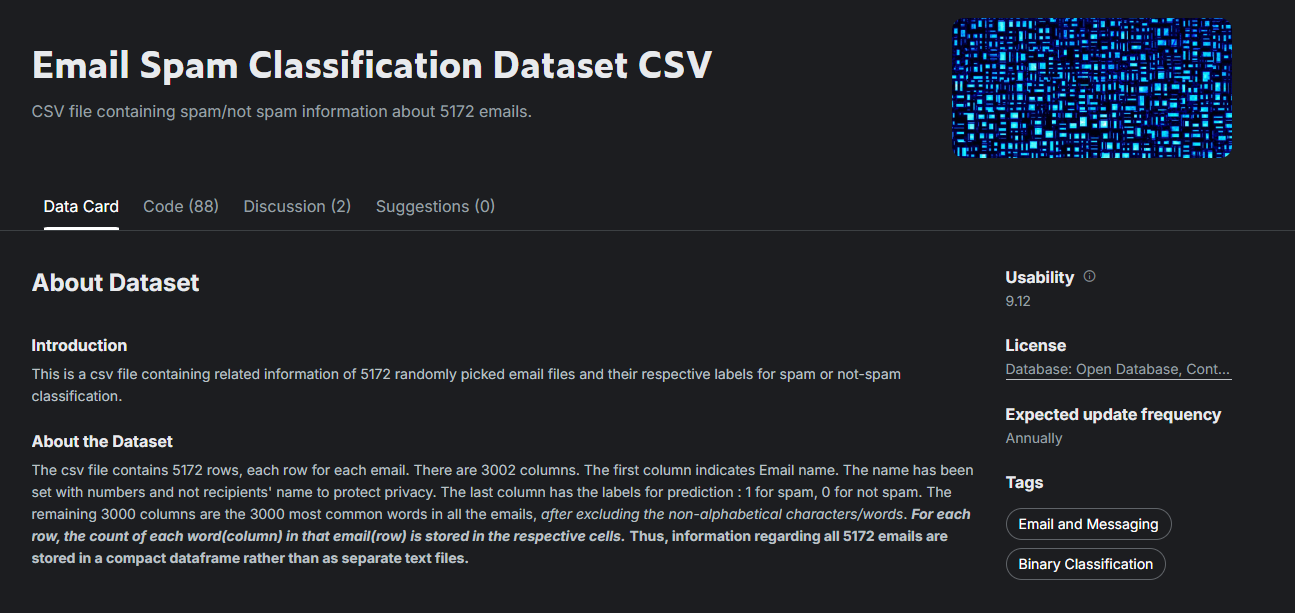

https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv/data

### Dataset Description
The dataset comprises 5,172 emails stored in a CSV file, designed for spam detection classification tasks. Each email is represented by 3,000 numerical features, corresponding to the most common words found across all emails, with each feature indicating the count of a specific word in that email. The first column serves as an anonymized email identifier, while the last column contains the binary labels: 1 for spam and 0 for not spam. This structured format enables efficient preprocessing and facilitates the training of machine learning models, such as the perceptron, for accurately distinguishing between spam and legitimate emails.

## Step 1.1 Exploring the data and getting to Know it!

In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\Alireza217\\Desktop\\NN TA FILES\\Perceptron\\emails.csv")
# Display the first few rows
print(df.head())

# Check for class distribution
print(df['Prediction'].value_counts())


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
Prediction
0    3672
1    1500
Name: count, dtype: int64


## Step 1.2 Data Pre-processing

### Handling Missing Values

In [36]:
# Check for missing values
print(df.isnull().sum())

# If missing values exist, decide on imputation or removal
df = df.dropna()  # Example: Dropping rows with missing values


Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


### Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = df.iloc[:, 1:-1]  # Assuming first column is Email Name and last is Label
y = df['Prediction']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Feature Selection (Optional but Recommended)

In [50]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Load the Dataset
# Replace 'path_to_your_dataset.csv' with the actual file path
df = pd.read_csv('C:\\Users\\Alireza217\\Desktop\\NN TA FILES\\Perceptron\\emails.csv')

# 2. Handle Missing Values
# Option 1: Drop rows with any missing values
df = df.dropna()

# Option 2: Alternatively, fill missing values with 0 (if appropriate)
# df = df.fillna(0)

# 3. Separate Features and Labels
# Assuming:
# - First column (index 0) is Email ID (to be excluded)
# - Last column is the Label
X = df.iloc[:, 1:-1]  # Features: Columns 2 to 3001
y = df.iloc[:, -1]    # Labels: Last column

# 4. Feature Selection using Chi-Squared Test
# Chi2 requires non-negative features, which is satisfied by word counts
# Select the top 1000 features
selector = SelectKBest(score_func=chi2, k=1000)
X_selected = selector.fit_transform(X, y)

# 5. Feature Scaling with Min-Max Scaler
# Perceptron can benefit from feature scaling; MinMaxScaler ensures non-negative values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

# 6. Split the Dataset into Training and Testing Sets
# Using an 80-20 split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: Verify the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (4137, 1000)
Testing Features Shape: (1035, 1000)
Training Labels Shape: (4137,)
Testing Labels Shape: (1035,)


### Creating a Perceptron Network

Accuracy:  0.9604
Precision: 0.9609
Recall:    0.9000
F1-Score:  0.9294
Confusion Matrix:
[[724  11]
 [ 30 270]]


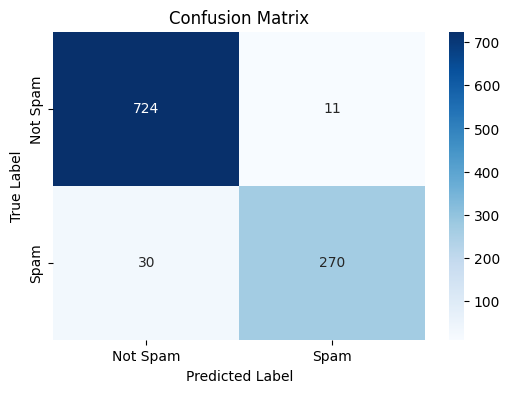

In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for epoch in range(self.n_epochs):
            errors = 0
            for idx in range(n_samples):
                linear_output = np.dot(X[idx], self.weights) + self.bias
                y_pred = self.activation_function(linear_output)
                
                # Calculate the update
                update = self.learning_rate * (y[idx] - y_pred)
                
                # Update weights and bias
                self.weights += update * X[idx]
                self.bias += update
                
                # Count errors
                if update != 0:
                    errors += 1
            # Optionally, print the number of errors in each epoch
            # print(f'Epoch {epoch+1}/{self.n_epochs}, Errors: {errors}')
            if errors == 0:
                # Stop early if no errors
                break
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)
    
    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

# 1. Load the Dataset
df = pd.read_csv('C:\\Users\\Alireza217\\Desktop\\NN TA FILES\\Perceptron\\emails.csv')  # Replace with your actual file path

# 2. Handle Missing Values
df = df.dropna()  # Alternatively, use df.fillna(0) if appropriate

# 3. Separate Features and Labels
X = df.iloc[:, 1:-1]  # Features: Columns 2 to 3001
y = df.iloc[:, -1]    # Labels: Last column

# 4. Feature Selection using Chi-Squared Test
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=1000)
X_selected = selector.fit_transform(X, y)

# 5. Feature Scaling with Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

# 6. Split the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Convert to NumPy Arrays if not already
X_train = X_train
X_test = X_test
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# 8. Initialize the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)

# 9. Train the Perceptron
perceptron.fit(X_train, y_train)

# 10. Make Predictions on the Test Set
y_pred = perceptron.predict(X_test)

# 11. Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 12. Print Evaluation Metrics
print(f'Accuracy:  {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1-Score:  {f1:.4f}')
print('Confusion Matrix:')
print(cm)

# 13. Visualize the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
